# Introduction

In this tutorial we will take images at 1m resolution, which are (10012, 10012) in shape, split them into smaller images (2016, 2016), and thus create dataset. 

In [1]:
import os
import sqlite3
import torch

from levee_hunter.dataset_images_choice import interactive_dataset_creation
from levee_hunter.database_management import add_file_to_db
from levee_hunter.paths import find_project_root
from levee_hunter.utils import find_splits
from levee_hunter.paths import check_if_file_exists

/Users/pawel/miniforge3/envs/Fathom/lib/python3.11/site-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.4 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/Users/pawel/1PhD_UCL/Fathom/GitHub_Stuff/levee_hunter/augmentations.py:17: UserWarning: Argument 'alpha_affine' is not valid and will be ignored.
  A.ElasticTransform(


In [2]:
# This is for database creation
tifs_path = find_project_root() / "data/raw/w4-Lidar/1m_resolution"


def reset_database(db_path):
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()

    cursor.execute("DROP TABLE IF EXISTS files")

    conn.commit()
    conn.close()


def create_database(db_path):
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()

    # Create the files table (if not exists)
    cursor.execute(
        """
    CREATE TABLE IF NOT EXISTS files (
        file_id TEXT PRIMARY KEY,
        path TEXT NOT NULL,
        state TEXT NOT NULL CHECK (state IN ('unused', 'validation', 'train_test'))
    )
    """
    )

    conn.commit()


db_path = find_project_root() / "data/files_db/1m_2016.db"
db_path

PosixPath('/Users/pawel/1PhD_UCL/Fathom/GitHub_Stuff/data/files_db/1m_2016.db')

In [3]:
tif_files = [file for file in os.listdir(tifs_path) if file.endswith(".tif")]
len(tif_files)

14

In [4]:
import rioxarray

# example of an image
img = rioxarray.open_rasterio(tifs_path / tif_files[0])
img.shape

(1, 10012, 10012)

In [5]:
find_splits(10012, 2016, max_overlap_frac=0.1)[:6]

n, overlap, total_covered


[(5, 17, 10012),
 (5, 18, 10008),
 (5, 19, 10004),
 (5, 20, 10000),
 (5, 21, 9996),
 (5, 22, 9992)]

In [6]:
reset_database(db_path)
create_database(db_path)
check_if_file_exists(db_path)

True

In [7]:
conn = sqlite3.connect(db_path)
for path_to_new_file in tif_files:
    new_file_id = add_file_to_db(conn, path_to_new_file)

File USGS_1M_15_x53y348_LA_Sabine_River_Lidar_2018_D18.tif added successfully with state 'unused'.
File USGS_1M_15_x37y434_MO_FEMANRCS_2020_D20.tif added successfully with state 'unused'.
File USGS_1M_15_x54y347_LA_Sabine_River_Lidar_2018_D18.tif added successfully with state 'unused'.
File USGS_one_meter_x61y424_CA_Sacramento_2017.tif added successfully with state 'unused'.
File USGS_1M_15_x50y350_LA_Sabine_River_Lidar_2018_D18.tif added successfully with state 'unused'.
File USGS_1m_x62y432_CA_NoCAL_Wildfires_B5a_2018.tif added successfully with state 'unused'.
File USGS_1M_15_x55y347_LA_Sabine_River_Lidar_2018_D18.tif added successfully with state 'unused'.
File USGS_one_meter_x63y423_CA_Sacramento_2017.tif added successfully with state 'unused'.
File USGS_1M_15_x38y435_MO_FEMANRCS_2020_D20.tif added successfully with state 'unused'.
File USGS_one_meter_x63y424_CA_Sacramento_2017.tif added successfully with state 'unused'.
File USGS_1m_x63y427_CA_NoCAL_Wildfires_B5a_2018.tif added s

In [8]:
# Those are the inputs we will be using for the dataset creation
print(db_path)
levees_file = "../data/raw/w3-Levees/levees.gpkg"
# resolution = "1m"
# size = 2016
# overlap = 17

/Users/pawel/1PhD_UCL/Fathom/GitHub_Stuff/data/files_db/1m_2016.db


In [ ]:
# UI Elements
# output = widgets.Output()
# Display UI
# display(output)

interactive_dataset_creation(
    db_path=db_path,
    levees_file_path=levees_file,
    resolution="1m",
    size=2016,
    overlap=17,
)

/Users/pawel/miniforge3/envs/Fathom/lib/python3.11/site-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in 'levees.gpkg': 'System' (default), 'AlignmentLine'. Specify layer parameter to avoid this warning.
  result = read_func(


Output()

# Code Below 

Works only after first dataset has been saved, user can play around with it to test if it works as expected etc.

In [21]:
train_test_dataset = torch.load(
    "../data/intermediate/1m_2016/train_test.pth", weights_only=False
)
bad_dataset = torch.load("../data/intermediate/1m_2016/bad.pth", weights_only=False)

In [22]:
len(train_test_dataset), len(bad_dataset)

(36, 2)

In [23]:
train_test_dataset.weights

tensor([1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 2., 2.])

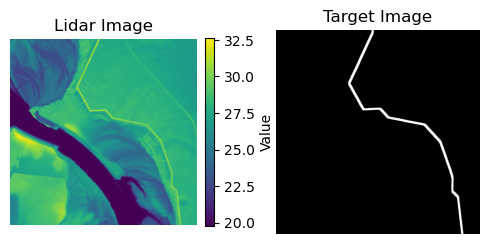

In [25]:
train_test_dataset.plot(2, figsize=(5, 5))